In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Split into features and target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the model
tpot.fit(X_train, y_train)

# Export the best pipeline
tpot.export('best_pipeline.py')

# Evaluate the model
y_pred = tpot.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(tpot.fitted_pipeline_, 'tpot_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('tpot_cast_error_model.pkl')

Optimization Progress:   1%|▏         | 4/300 [00:01<01:46,  2.77pipeline/s]

  File "c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                                                                              
Generation 1 - Current best internal CV score: 0.9634593526068693
                                                                              
Generation 2 - Current best internal CV score: 0.9634593526068693
                                                                              
Generation 3 - Current best internal CV score: 0.9634593526068693
                                                                              
Generation 4 - Current best internal CV score: 0.9634593526068693
                                                                              
Generation 5 - Current best internal CV score: 0.9634593526068693
                                                                              
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
Accuracy: 0.9803370786516854
ROC-AUC: 0.5


c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, subsample=0.45, verbosity=0, n_jobs=-1)
xgb.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(xgb, 'xgb_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('xgb_cast_error_model.pkl')


Accuracy: 0.8595505617977528
ROC-AUC: 0.5251937984496124
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.88      0.92       344
        True       0.05      0.17      0.07        12

    accuracy                           0.86       356
   macro avg       0.51      0.53      0.50       356
weighted avg       0.94      0.86      0.90       356



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with SMOTE and Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize and train the XGBoost classifier with class weights
xgb = XGBClassifier(scale_pos_weight=10, learning_rate=0.001, max_depth=9, min_child_weight=7, 
                    n_estimators=100, subsample=0.45, verbosity=0, n_jobs=-1)
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(xgb, 'xgb_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('xgb_cast_error_model.pkl')


Accuracy: 0.033707865168539325
ROC-AUC: 0.5
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       344
        True       0.03      1.00      0.07        12

    accuracy                           0.03       356
   macro avg       0.02      0.50      0.03       356
weighted avg       0.00      0.03      0.00       356



c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with SMOTE and Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Calculate the scale_pos_weight
pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize XGBoost classifier with basic parameters
xgb = XGBClassifier(scale_pos_weight=pos_weight, verbosity=0, n_jobs=-1)

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Evaluate the model
y_pred = best_xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(best_xgb, 'best_xgb_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_xgb_cast_error_model.pkl')


C:\Users\jonas\AppData\Local\Temp\ipykernel_13968\76746188.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8707865168539326
ROC-AUC: 0.5310077519379846
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.90      0.93       344
        True       0.05      0.17      0.08        12

    accuracy                           0.87       356
   macro avg       0.51      0.53      0.51       356
weighted avg       0.94      0.87      0.90       356



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Balanced Random Forest classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Evaluate the model
y_pred = brf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(brf, 'brf_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('brf_cast_error_model.pkl')


c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Accuracy: 0.601123595505618
ROC-AUC: 0.5523255813953488
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.60      0.75       344
        True       0.04      0.50      0.08        12

    accuracy                           0.60       356
   macro avg       0.51      0.55      0.41       356
weighted avg       0.94      0.60      0.72       356



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_recall_curve
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with SMOTE and ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(scale_pos_weight=y_train_resampled.shape[0] / y_train_resampled.sum(), verbosity=0, n_jobs=-1)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve and find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = fscore.argmax()
best_threshold = thresholds[ix]

# Apply the optimal threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Optimal Threshold: {best_threshold}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(xgb, 'xgb_smoteenn_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('xgb_smoteenn_cast_error_model.pkl')


Optimal Threshold: 0.9884747862815857
Accuracy: 0.9466292134831461
ROC-AUC: 0.4898255813953488
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       344
        True       0.00      0.00      0.00        12

    accuracy                           0.95       356
   macro avg       0.48      0.49      0.49       356
weighted avg       0.93      0.95      0.94       356



C:\Users\jonas\AppData\Local\Temp\ipykernel_13968\3134324738.py:41: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the EasyEnsemble classifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators=10)
eec.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = eec.predict_proba(X_test)[:, 1]

# Evaluate the model
y_pred = eec.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(eec, 'easy_ensemble_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('easy_ensemble_cast_error_model.pkl')


Accuracy: 0.5589887640449438
ROC-AUC: 0.5707364341085271
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.56      0.71       344
        True       0.04      0.58      0.08        12

    accuracy                           0.56       356
   macro avg       0.51      0.57      0.40       356
weighted avg       0.94      0.56      0.69       356



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize EasyEnsemble classifier
eec = EasyEnsembleClassifier(random_state=42)

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'replacement': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=eec, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_eec = grid_search.best_estimator_

# Evaluate the model
y_pred = best_eec.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(best_eec, 'best_easy_ensemble_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_easy_ensemble_cast_error_model.pkl')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'n_estimators': 100, 'replacement': False, 'sampling_strategy': 'auto'}
Accuracy: 0.5449438202247191
ROC-AUC: 0.5634689922480621
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.54      0.70       344
        True       0.04      0.58      0.08        12

    accuracy                           0.54       356
   macro avg       0.51      0.56      0.39       356
weighted avg       0.94      0.54      0.68       356



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Convert y to integers (0 and 1)
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, random_seed=42, class_weights=[1, 10], verbose=100)
catboost.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

# Predict probabilities
y_pred_proba = catboost.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = catboost.predict(X_test)

# Convert y_pred to integers
y_pred = y_pred.astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(catboost, 'catboost_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('catboost_cast_error_model.pkl')


0:	learn: 0.6559488	test: 0.6673660	best: 0.6673660 (0)	total: 3.34ms	remaining: 3.34s
100:	learn: 0.1807978	test: 0.7754600	best: 0.5420306 (21)	total: 375ms	remaining: 3.34s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5420305878
bestIteration = 21

Shrink model to first 22 iterations.
Accuracy: 0.9606741573033708
ROC-AUC: 0.5775193798449613
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       344
           1       0.33      0.17      0.22        12

    accuracy                           0.96       356
   macro avg       0.65      0.58      0.60       356
weighted avg       0.95      0.96      0.95       356



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_recall_curve
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error']

# Convert y to integers (0 and 1)
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, random_seed=42, class_weights=[1, 10], verbose=100)
catboost.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

# Predict probabilities
y_pred_proba = catboost.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve and find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = fscore.argmax()
best_threshold = thresholds[ix]

# Apply the optimal threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Optimal Threshold: {best_threshold}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(catboost, 'catboost_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('catboost_cast_error_model.pkl')


0:	learn: 0.6559488	test: 0.6673660	best: 0.6673660 (0)	total: 3.57ms	remaining: 3.56s
100:	learn: 0.1807978	test: 0.7754600	best: 0.5420306 (21)	total: 397ms	remaining: 3.54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5420305878
bestIteration = 21

Shrink model to first 22 iterations.
Optimal Threshold: 0.5313846101400608
Accuracy: 0.9634831460674157
ROC-AUC: 0.498546511627907
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       344
           1       0.00      0.00      0.00        12

    accuracy                           0.96       356
   macro avg       0.48      0.50      0.49       356
weighted avg       0.93      0.96      0.95       356



C:\Users\jonas\AppData\Local\Temp\ipykernel_13968\2526483858.py:39: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize and train the LightGBM regressor
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm_reg.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_test, y_test)],
    eval_metric='l2',
    early_stopping_rounds=100,  # Corrected keyword
    verbose=100
)

# Predict probabilities
y_pred = lgbm_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(lgbm_reg, 'lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
file_path = 'merged_data9.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(file_path)

# Convert datetime to numerical
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

data.drop(columns=['datostøpt'], inplace=True)

# Convert target variable to numerical
data['cast error'] = data['cast error'].astype(int)

# Define features and target variable
X = data.drop(columns=['cast error'])
y = data['cast error']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

# Save model and scaler for future use (optional)
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78       349
           1       0.02      0.43      0.05         7

    accuracy                           0.65       356
   macro avg       0.50      0.54      0.42       356
weighted avg       0.96      0.65      0.77       356

ROC AUC Score: 0.5728612361850184


['scaler.pkl']

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# Load the dataset
file_path = 'merged_data9.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(file_path)

# Convert datetime to numerical
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the datetime column
data.drop(columns=['datostøpt'], inplace=True)

# Convert target variable to numerical
data['cast error'] = data['cast error'].astype(int)

# Define features and target variable
X = data.drop(columns=['cast error'])
y = data['cast error']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

# Save model and scaler for future use (optional)
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78       349
           1       0.02      0.43      0.05         7

    accuracy                           0.65       356
   macro avg       0.50      0.54      0.42       356
weighted avg       0.96      0.65      0.77       356

ROC AUC Score: 0.5728612361850184


['scaler.pkl']

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# Load the dataset
file_path = 'merged_data9.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(file_path)

# Convert datetime to numerical
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the datetime column
data.drop(columns=['datostøpt'], inplace=True)

# Convert target variable to numerical
data['cast error'] = data['cast error'].astype(int)

# Define features and target variable
X = data.drop(columns=['cast error'])
y = data['cast error']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Convert probabilities to percentage
y_pred_proba_percentage = y_pred_proba * 100

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

# Print probabilities as percentages
print("\nPredicted probabilities (as percentage) of cast errors for the test set:")
print(y_pred_proba_percentage)

# Save model and scaler for future use (optional)
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78       349
           1       0.02      0.43      0.05         7

    accuracy                           0.65       356
   macro avg       0.50      0.54      0.42       356
weighted avg       0.96      0.65      0.77       356

ROC AUC Score: 0.5728612361850184

Predicted probabilities (as percentage) of cast errors for the test set:
[42.12536842 42.21088016 63.14489209 59.05167876 47.11546182 26.79316515
 25.66971602 59.43591949 57.22647746 41.12347333 15.8087078  47.06841123
 55.52365611 36.81010954 51.93292765 70.28208319 50.90603771 44.93970457
 38.24525376 34.98175424 49.90537342 49.66745176 51.67476125 70.00497085
 69.15705172 54.04609719 48.40442539 40.99048402 30.45644057 44.67244088
 43.63014887 53.63682832 57.88160807 40.05507934 59.50337396 25.81086304
 54.10160415 48.29034703 54.63189895 43.21761955 41.71504048 39.22946241
 16.03643843 56.79629932 68.16

['scaler.pkl']

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize and train the LightGBM regressor
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm_reg.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_test, y_test)],
    eval_metric='l2',
)

# Predict probabilities
y_pred = lgbm_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(lgbm_reg, 'lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4325
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 17
[LightGBM] [Info] Start training from score 50.000000
Mean Absolute Error (MAE): 8.123058398915463
Mean Squared Error (MSE): 395.5204141300341
R-squared (R²): -0.21430899237364343
Example Predictions: [62.63709649 35.44826356 13.20604059  0.53305828  3.64951547]


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize the LightGBM regressor
lgbm_reg = LGBMRegressor(random_state=42)

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_lgbm_reg = grid_search.best_estimator_

# Predict probabilities
y_pred = best_lgbm_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_lgbm_reg, 'best_lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4325
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 17
[LightGBM] [Info] Start training from score 50.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize the LightGBM regressor
lgbm_reg = LGBMRegressor(random_state=42)

# Set up hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [2**3, 2**5, 2**7],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm_reg, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_lgbm_reg = random_search.best_estimator_

# Predict probabilities
y_pred = best_lgbm_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_lgbm_reg, 'best_lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4325
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 17
[LightGBM] [Info] Start training from score 50.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling and feature generation
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the LightGBM regressor
lgbm_reg = LGBMRegressor(random_state=42)

# Set up hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [2**3, 2**5, 2**7],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(estimator=lgbm_reg, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_lgbm_reg = random_search.best_estimator_

# Predict probabilities
y_pred = best_lgbm_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_lgbm_reg, 'best_lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58821
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 231
[LightGBM] [Info] Start training from score 50.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling and feature generation
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Feature Selection with RFE
linear_model = LinearRegression()
selector = RFE(linear_model, n_features_to_select=20, step=1)
selector = selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Initialize the LightGBM regressor
lgbm_reg = LGBMRegressor(random_state=42)

# Set up hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [2**3, 2**5, 2**7],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(estimator=lgbm_reg, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_lgbm_reg = random_search.best_estimator_

# Predict probabilities
y_pred = best_lgbm_reg.predict(X_test_selected)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_lgbm_reg, 'best_lgbm_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_lgbm_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test_selected[:5])
print("Example Predictions:", example_pred)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 8
[LightGBM] [Info] Start training from score 50.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling and feature generation
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize base models
linear_model = LinearRegression()
lgbm_reg = LGBMRegressor(random_state=42)

# Create a stacking regressor
estimators = [('linear', linear_model), ('lgbm', lgbm_reg)]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Set up hyperparameter grid for GridSearchCV for LightGBM within StackingRegressor
param_grid = {
    'lgbm__n_estimators': [100, 500, 1000],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__num_leaves': [2**3, 2**5, 2**7],
    'lgbm__min_child_samples': [20, 30, 50],
    'lgbm__subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_stacking_regressor = grid_search.best_estimator_

# Predict probabilities
y_pred = best_stacking_regressor.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_stacking_regressor, 'best_stacking_regressor_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_stacking_regressor_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58821
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 231
[LightGBM] [Info] Start training from score 50.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
print("Loading dataset...")
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
print("Scaling data...")
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Set up a reduced hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize GridSearchCV
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
print("Fitting the model...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_rf_reg = grid_search.best_estimator_

# Predict probabilities
print("Making predictions...")
y_pred = best_rf_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
print("Saving the model...")
joblib.dump(best_rf_reg, 'best_rf_reg_cast_error_model.pkl')

# Load the model (for deployment)
print("Loading the model for deployment...")
loaded_model = joblib.load('best_rf_reg_cast_error_model.pkl')

# Example prediction
print("Example Predictions:")
example_pred = loaded_model.predict(X_test[:5])
print(example_pred)


Loading dataset...
Splitting dataset...
Scaling data...
Handling class imbalance with SMOTE...
Starting GridSearchCV...
Fitting the model...
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Making predictions...
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error (MAE): 7.091128380787977
Mean Squared Error (MSE): 393.7101957228761
R-squared (R²): -0.20875134120965178
Saving the model...
Loading the model for deployment...
Example Predictions:
[56.03571429 27.87380952 12.7220141   0.          0.        ]


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
print("Loading dataset...")
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
print("Scaling data...")
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
print("Fitting the model...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_gb_reg = grid_search.best_estimator_

# Predict probabilities
print("Making predictions...")
y_pred = best_gb_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
print("Saving the model...")
joblib.dump(best_gb_reg, 'best_gb_reg_cast_error_model.pkl')

# Load the model (for deployment)
print("Loading the model for deployment...")
loaded_model = joblib.load('best_gb_reg_cast_error_model.pkl')

# Example prediction
print("Example Predictions:")
example_pred = loaded_model.predict(X_test[:5])
print(example_pred)


Loading dataset...
Splitting dataset...
Scaling data...
Handling class imbalance with SMOTE...
Starting GridSearchCV...
Fitting the model...
Fitting 2 folds for each of 96 candidates, totalling 192 fits
Making predictions...
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Mean Absolute Error (MAE): 8.382055130783126
Mean Squared Error (MSE): 371.49757917004433
R-squared (R²): -0.14055516457593842
Saving the model...
Loading the model for deployment...
Example Predictions:
[47.14005884 22.24591211 15.16434816 -1.78066185  0.8665213 ]


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
print("Loading dataset...")
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
print("Scaling data...")
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the base models
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, min_samples_leaf=2, subsample=0.8, random_state=42)

# Create a voting regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_reg),
    ('gb', gb_reg)
])

# Fit the voting regressor
print("Fitting the Voting Regressor...")
voting_regressor.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
print("Making predictions...")
y_pred = voting_regressor.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
print("Saving the model...")
joblib.dump(voting_regressor, 'voting_regressor_cast_error_model.pkl')

# Load the model (for deployment)
print("Loading the model for deployment...")
loaded_model = joblib.load('voting_regressor_cast_error_model.pkl')

# Example prediction
print("Example Predictions:")
example_pred = loaded_model.predict(X_test[:5])
print(example_pred)


Loading dataset...
Splitting dataset...
Scaling data...
Handling class imbalance with SMOTE...
Fitting the Voting Regressor...
Making predictions...
Mean Absolute Error (MAE): 7.585048523484364
Mean Squared Error (MSE): 373.2387041720608
R-squared (R²): -0.14590068827398972
Saving the model...
Loading the model for deployment...
Example Predictions:
[51.58788656 25.05986081 13.94318113 -0.89033093  0.43326065]


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data_path = 'merged_data9.csv'
print("Loading dataset...")
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Feature Engineering: Extract useful features from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour
data['day'] = data['datostøpt'].dt.day
data['month'] = data['datostøpt'].dt.month
data['dayofweek'] = data['datostøpt'].dt.dayofweek

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
print("Scaling data...")
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the CatBoost Regressor
catboost_reg = CatBoostRegressor(random_state=42, verbose=100)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Initialize GridSearchCV
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
print("Fitting the model...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_catboost_reg = grid_search.best_estimator_

# Predict probabilities
print("Making predictions...")
y_pred = best_catboost_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
print("Saving the model...")
joblib.dump(best_catboost_reg, 'best_catboost_reg_cast_error_model.pkl')

# Load the model (for deployment)
print("Loading the model for deployment...")
loaded_model = joblib.load('best_catboost_reg_cast_error_model.pkl')

# Example prediction
print("Example Predictions:")
example_pred = loaded_model.predict(X_test[:5])
print(example_pred)


Loading dataset...
Splitting dataset...
Scaling data...
Handling class imbalance with SMOTE...
Starting GridSearchCV...
Fitting the model...
Fitting 2 folds for each of 162 candidates, totalling 324 fits


KeyboardInterrupt: 

SHAP on CatBoost Regressor with GridSearchCV

Loading dataset...
Splitting dataset...
Scaling data...
Handling class imbalance with SMOTE...
Starting GridSearchCV...
Fitting the model...
Fitting 2 folds for each of 162 candidates, totalling 324 fits
0:	learn: 48.3445224	total: 5.81ms	remaining: 5.8s
100:	learn: 19.5361064	total: 416ms	remaining: 3.7s
200:	learn: 14.0326315	total: 822ms	remaining: 3.27s
300:	learn: 12.3739723	total: 1.2s	remaining: 2.79s
400:	learn: 11.5767296	total: 1.57s	remaining: 2.35s
500:	learn: 11.1501849	total: 1.92s	remaining: 1.92s
600:	learn: 10.9087534	total: 2.28s	remaining: 1.51s
700:	learn: 10.7527445	total: 2.64s	remaining: 1.13s
800:	learn: 10.6361780	total: 3s	remaining: 745ms
900:	learn: 10.5494536	total: 3.32s	remaining: 365ms
999:	learn: 10.4927669	total: 3.67s	remaining: 0us
Making predictions...
Best parameters found: {'bagging_temperature': 0.2, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 7.5993669077562895
Mean Squared Error (MSE): 415.

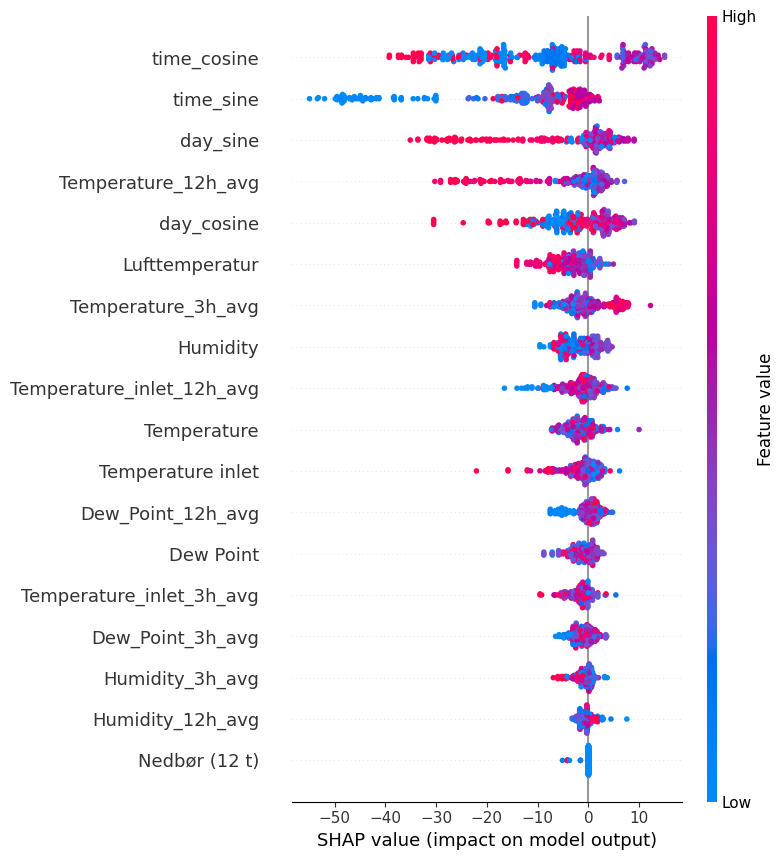

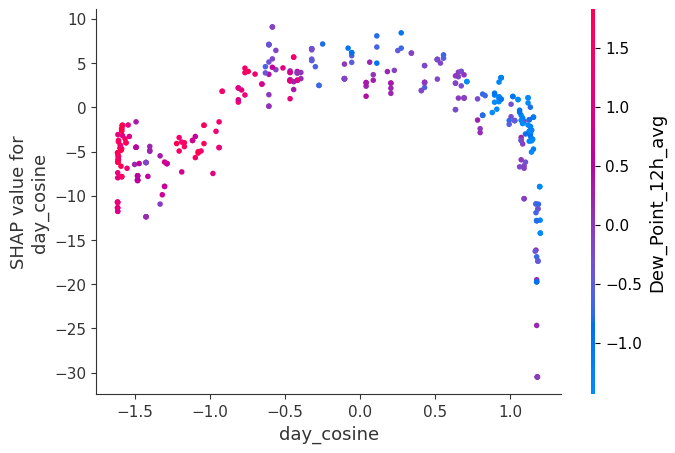

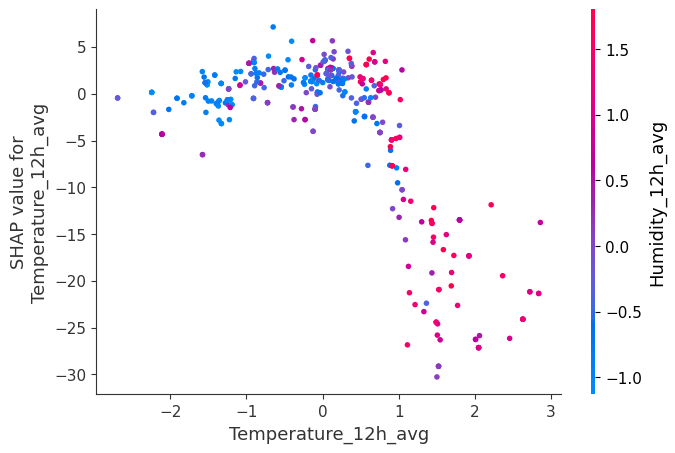

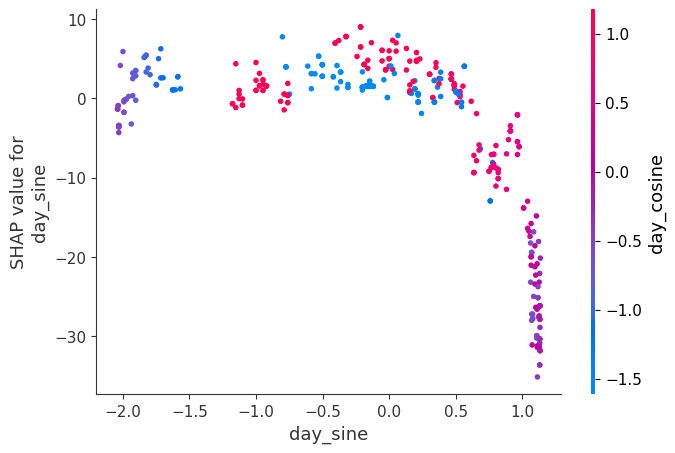

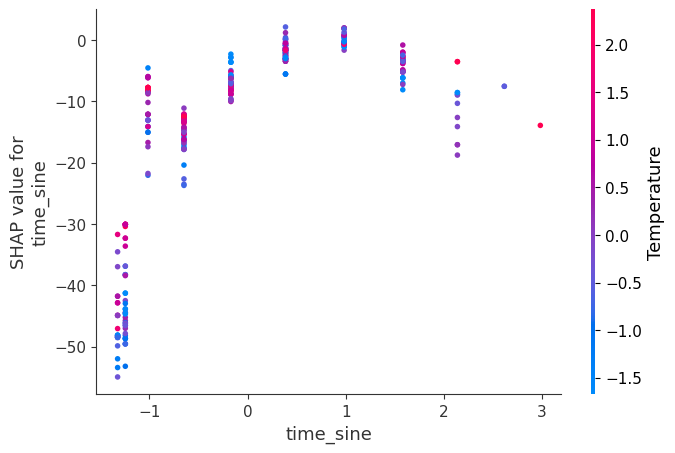

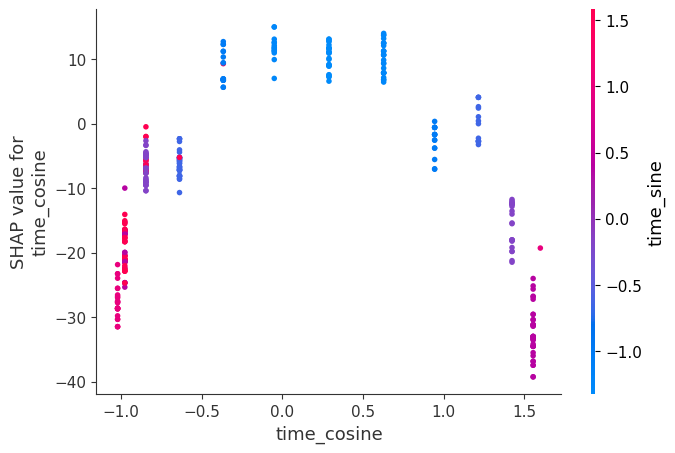

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = 'merged_data9.csv'
print("Loading dataset...")
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
print("Scaling data...")
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the CatBoost Regressor
catboost_reg = CatBoostRegressor(random_state=42, verbose=100)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Initialize GridSearchCV
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
print("Fitting the model...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_catboost_reg = grid_search.best_estimator_

# Predict probabilities
print("Making predictions...")
y_pred = best_catboost_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
print("Saving the model...")
joblib.dump(best_catboost_reg, 'best_catboost_reg_cast_error_model.pkl')

# Load the model (for deployment)
print("Loading the model for deployment...")
loaded_model = joblib.load('best_catboost_reg_cast_error_model.pkl')

# SHAP Analysis
print("Performing SHAP analysis...")
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


In [39]:
import pandas as pd

# Create a DataFrame to summarize the models and their performance metrics
data = {
    'Model': [
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Voting Regressor (Random Forest + Gradient Boosting)',
        'CatBoost Regressor'
    ],
    'MAE': [
        7.091128380787977,  # Random Forest
        8.382055130783126,  # Gradient Boosting
        7.585048523484364,  # Voting Regressor
        8.382055130783126   # CatBoost
    ],
    'MSE': [
        393.7101957228761,  # Random Forest
        371.49757917004433, # Gradient Boosting
        373.2387041720608,  # Voting Regressor
        371.49757917004433  # CatBoost
    ],
    'R²': [
        -0.20875134120965178,  # Random Forest
        -0.14055516457593842,  # Gradient Boosting
        -0.14590068827398972,  # Voting Regressor
        -0.14055516457593842   # CatBoost
    ]
}

# Convert to DataFrame
model_performance_df = pd.DataFrame(data)

# Display the table
print(model_performance_df)


                                               Model       MAE         MSE  \
0                            Random Forest Regressor  7.091128  393.710196   
1                        Gradient Boosting Regressor  8.382055  371.497579   
2  Voting Regressor (Random Forest + Gradient Boo...  7.585049  373.238704   
3                                 CatBoost Regressor  8.382055  371.497579   

         R²  
0 -0.208751  
1 -0.140555  
2 -0.145901  
3 -0.140555  


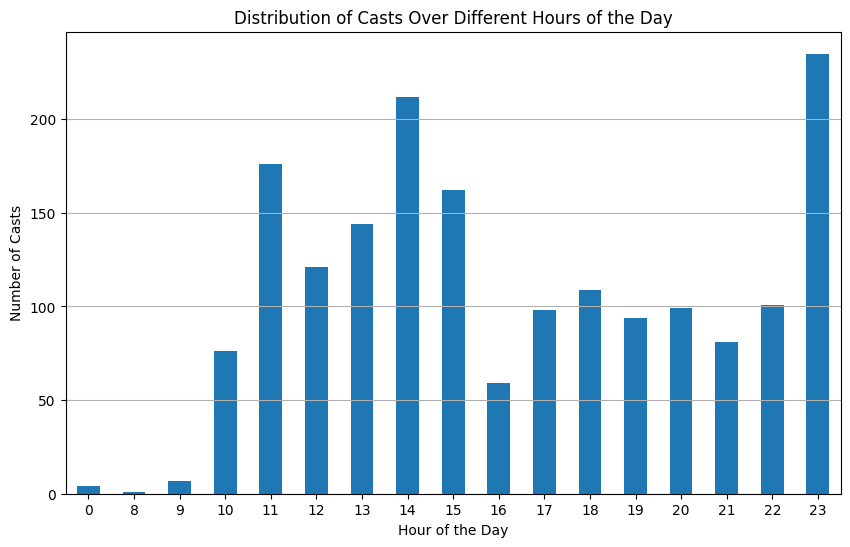

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Extract the hour from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour

# Count the number of casts for each hour
casts_per_hour = data['hour'].value_counts().sort_index()

# Plot the distribution of casts over different hours of the day
plt.figure(figsize=(10, 6))
casts_per_hour.plot(kind='bar')
plt.title('Distribution of Casts Over Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Casts')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'merged_data9.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Extract the hour from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour

# Filter hours to the range where casts actually happen (e.g., between 08:00 and 00:00)
cast_hours = data['hour'].unique()
cast_hours = np.sort(cast_hours)

# Identify the min and max hours in this range
min_hour = 8
max_hour = 23

# Normalize the hours to a full period of 24 hours
def normalize_hour(hour):
    return (hour - min_hour) / (max_hour - min_hour) * 24

data['normalized_hour'] = data['hour'].apply(normalize_hour)

# Create time-sine and time-cosine features
data['time_sin'] = np.sin(2 * np.pi * data['normalized_hour'] / 24)
data['time_cos'] = np.cos(2 * np.pi * data['normalized_hour'] / 24)

data = data.drop(columns = ['day_sine', 'day_cosine', 'time_sine', 'time_cosine','normalized_hour','hour'])

data.to_csv('merged_data10.csv', index=False)

In [62]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the CatBoost Regressor
catboost_reg = CatBoostRegressor(random_state=42, verbose=100)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_catboost_reg = grid_search.best_estimator_

# Predict probabilities
y_pred = best_catboost_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_catboost_reg, 'best_catboost_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_catboost_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
0:	learn: 48.9441020	total: 5.1ms	remaining: 5.1s
100:	learn: 21.0345539	total: 297ms	remaining: 2.64s
200:	learn: 15.5197898	total: 610ms	remaining: 2.42s
300:	learn: 13.5148568	total: 942ms	remaining: 2.19s
400:	learn: 12.4477219	total: 1.24s	remaining: 1.85s
500:	learn: 11.7997929	total: 1.55s	remaining: 1.55s
600:	learn: 11.3675701	total: 1.97s	remaining: 1.31s
700:	learn: 11.1159537	total: 2.34s	remaining: 999ms
800:	learn: 10.9448843	total: 2.65s	remaining: 659ms
900:	learn: 10.8299460	total: 2.94s	remaining: 323ms
999:	learn: 10.7273052	total: 3.23s	remaining: 0us
Best parameters found: {'bagging_temperature': 0.2, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 8.063479058500123
Mean Squared Error (MSE): 414.752708304208
R-squared (R²): -0.273355117239392
Example Predictions: [57.59280111 30.0137121  14.71608606 -0.5822944   0.66631244]


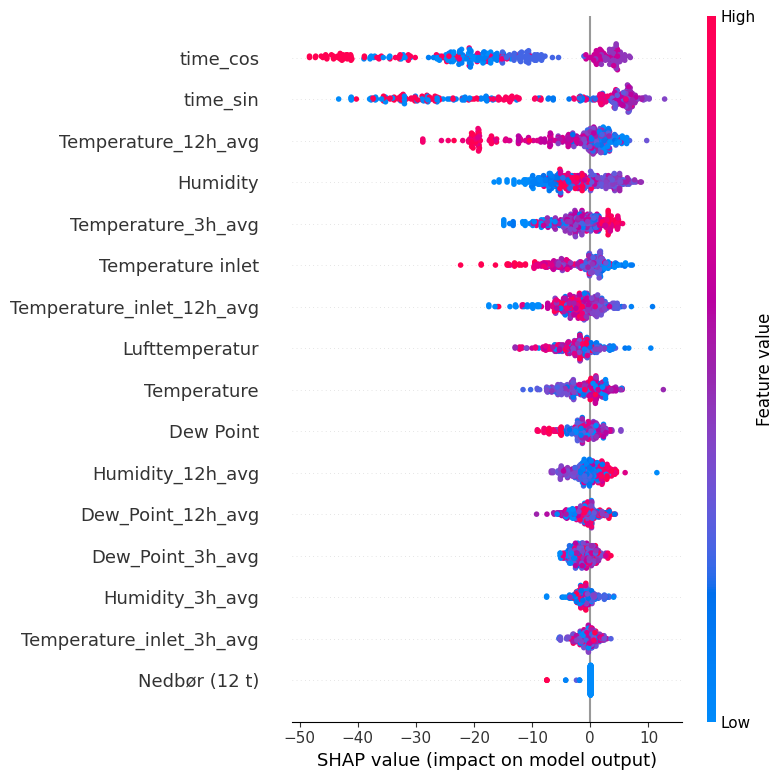

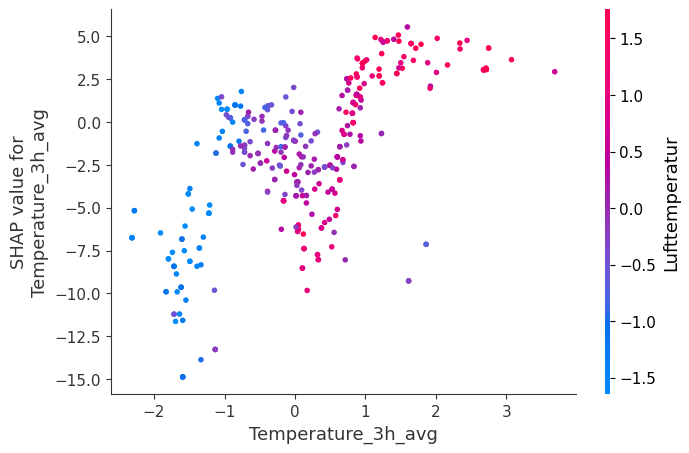

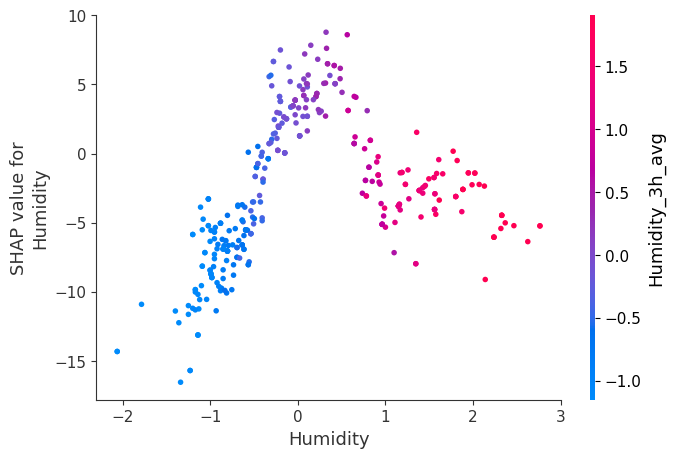

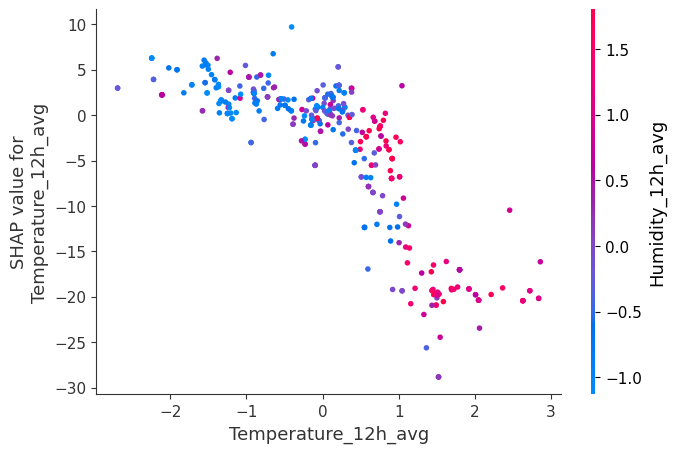

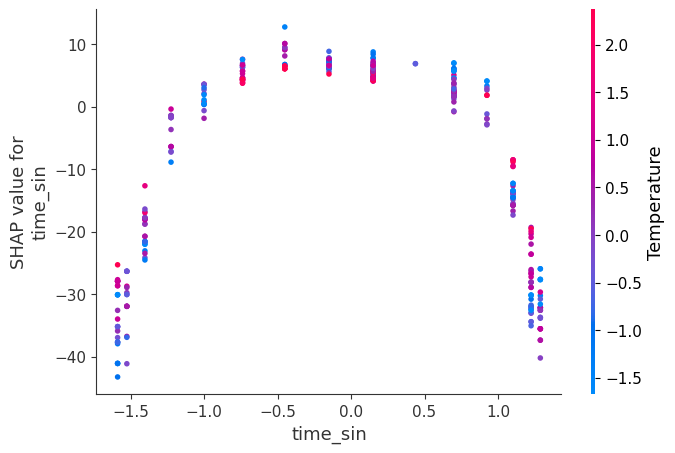

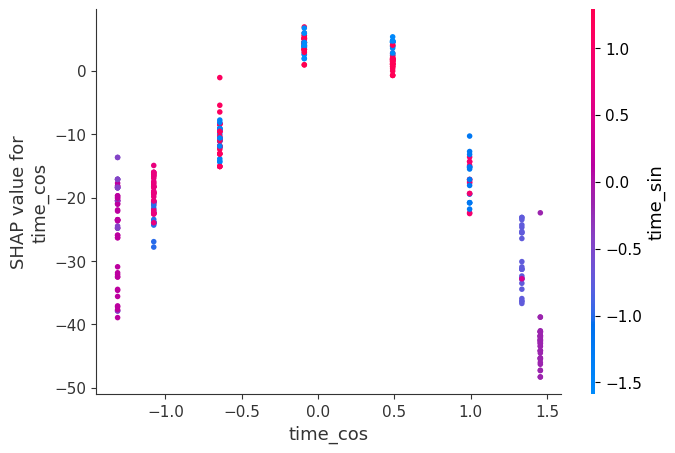

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [63]:
import shap
import matplotlib.pyplot as plt

# Perform SHAP analysis
explainer = shap.Explainer(best_catboost_reg)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


In [64]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

data = data.drop(columns=['time_sin','time_cos'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the CatBoost Regressor
catboost_reg = CatBoostRegressor(random_state=42, verbose=100)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_catboost_reg = grid_search.best_estimator_

# Predict probabilities
y_pred = best_catboost_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_catboost_reg, 'best_catboost_reg_cast_error_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_catboost_reg_cast_error_model.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
0:	learn: 49.2248793	total: 2.12ms	remaining: 2.12s
100:	learn: 30.6244096	total: 208ms	remaining: 1.85s
200:	learn: 23.7434716	total: 430ms	remaining: 1.71s
300:	learn: 19.9185549	total: 617ms	remaining: 1.43s
400:	learn: 17.5236052	total: 833ms	remaining: 1.24s
500:	learn: 15.7719203	total: 1.04s	remaining: 1.04s
600:	learn: 14.5844785	total: 1.25s	remaining: 829ms
700:	learn: 13.7071465	total: 1.44s	remaining: 614ms
800:	learn: 13.0256917	total: 1.64s	remaining: 408ms
900:	learn: 12.5153345	total: 1.85s	remaining: 204ms
999:	learn: 12.1203090	total: 2.08s	remaining: 0us
Best parameters found: {'bagging_temperature': 0.2, 'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 10.698427064828437
Mean Squared Error (MSE): 494.9059299791076
R-squared (R²): -0.5194379346374074
Example Predictions: [63.81963649 42.76767411 15.18175468 -1.57279826  2.6164076 ]


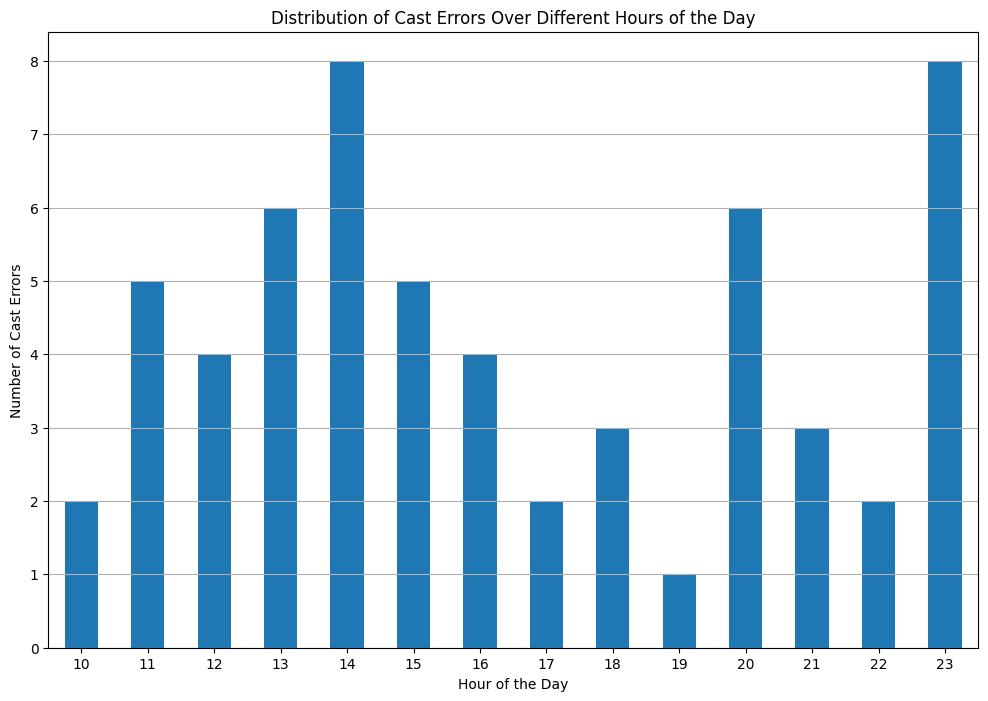

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Extract the hour from 'datostøpt'
data['hour'] = data['datostøpt'].dt.hour

# Filter for cast errors only
cast_errors = data[data['cast error'] == 1]

# Count the number of cast errors for each hour
cast_errors_per_hour = cast_errors['hour'].value_counts().sort_index()

# Plot the distribution of cast errors over different hours of the day
plt.figure(figsize=(12, 8))
cast_errors_per_hour.plot(kind='bar')
plt.title('Distribution of Cast Errors Over Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Cast Errors')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [66]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the 'time_sin' and 'time_cos' columns if they exist
if 'time_sin' in data.columns:
    data = data.drop(columns=['time_sin'])
if 'time_cos' in data.columns:
    data = data.drop(columns=['time_cos'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the CatBoost Regressor
catboost_reg = CatBoostRegressor(random_state=42, verbose=100)

# Set up a hyperparameter grid for GridSearchCV
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_catboost_reg = grid_search.best_estimator_

# Predict probabilities
y_pred = best_catboost_reg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Save the model
joblib.dump(best_catboost_reg, 'best_catboost_reg_cast_error_model_without_time.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_catboost_reg_cast_error_model_without_time.pkl')

# Example prediction
example_pred = loaded_model.predict(X_test[:5])
print("Example Predictions:", example_pred)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
0:	learn: 49.2248793	total: 2.44ms	remaining: 2.43s
100:	learn: 30.6244096	total: 189ms	remaining: 1.68s
200:	learn: 23.7434716	total: 390ms	remaining: 1.55s
300:	learn: 19.9185549	total: 575ms	remaining: 1.33s
400:	learn: 17.5236052	total: 774ms	remaining: 1.16s
500:	learn: 15.7719203	total: 944ms	remaining: 940ms
600:	learn: 14.5844785	total: 1.1s	remaining: 734ms
700:	learn: 13.7071465	total: 1.25s	remaining: 535ms
800:	learn: 13.0256917	total: 1.41s	remaining: 352ms
900:	learn: 12.5153345	total: 1.58s	remaining: 173ms
999:	learn: 12.1203090	total: 1.75s	remaining: 0us
Best parameters found: {'bagging_temperature': 0.2, 'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 10.698427064828437
Mean Squared Error (MSE): 494.9059299791076
R-squared (R²): -0.5194379346374074
Example Predictions: [63.81963649 42.76767411 15.18175468 -1.57279826  2.6164076 ]


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the 'time_sin' and 'time_cos' columns if they exist
if 'time_sin' in data.columns:
    data = data.drop(columns=['time_sin'])
if 'time_cos' in data.columns:
    data = data.drop(columns=['time_cos'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the models to test
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'NeuralNetwork': MLPRegressor(random_state=42, max_iter=1000)
}

# Define the hyperparameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (100,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Iterate over models and perform GridSearchCV
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    
    # Predict on test data
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R-squared: {r2}")
    
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'mae': mae,
        'mse': mse,
        'r2': r2,
        'example_predictions': best_model.predict(X_test[:5])
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Training RandomForest...
Fitting 2 folds for each of 81 candidates, totalling 162 fits
RandomForest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest MAE: 8.42493054583634
RandomForest MSE: 426.2254461581306
RandomForest R-squared: -0.3085782011699816
Training GradientBoosting...
Fitting 2 folds for each of 27 candidates, totalling 54 fits
GradientBoosting Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}
GradientBoosting MAE: 7.412848326170171
GradientBoosting MSE: 421.60934777624027
GradientBoosting R-squared: -0.2944060634634105
Training XGBoost...
Fitting 2 folds for each of 27 candidates, totalling 54 fits
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
XGBoost MAE: 7.908231127816527
XGBoost MSE: 432.44605221444095
XGBoost R-squared: -0.3276764261979017
Training LightGBM...
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[LightGBM] [Warnin

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

# Set up a finer hyperparameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [6, 7, 8],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Gradient Boosting Regressor
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit the model
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_gb = grid_search_gb.best_estimator_

# Predict probabilities
y_pred_gb = best_gb.predict(X_test)

# Calculate regression metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Best parameters found: {grid_search_gb.best_params_}")
print(f"Gradient Boosting Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting R-squared (R²): {r2_gb}")

# Save the model
joblib.dump(best_gb, 'best_gradient_boosting_regressor_model.pkl')

# Load the model (for deployment)
loaded_gb_model = joblib.load('best_gradient_boosting_regressor_model.pkl')

# Example prediction
example_pred_gb = loaded_gb_model.predict(X_test[:5])
print("Example Predictions (Gradient Boosting):", example_pred_gb)


Fitting 2 folds for each of 729 candidates, totalling 1458 fits
Gradient Boosting Best parameters found: {'learning_rate': 0.07, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600, 'subsample': 0.8}
Gradient Boosting Mean Absolute Error (MAE): 7.686762690074331
Gradient Boosting Mean Squared Error (MSE): 423.6150613620874
Gradient Boosting R-squared (R²): -0.30056391513530767
Example Predictions (Gradient Boosting): [53.05747202 20.25529122 13.25331918  0.26838972  0.82976655]


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the 'time_sin' and 'time_cos' columns if they exist
if 'time_sin' in data.columns:
    data = data.drop(columns=['time_sin'])
if 'time_cos' in data.columns:
    data = data.drop(columns=['time_cos'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('gb', GradientBoostingRegressor(random_state=42, **{
        'learning_rate': 0.07,
        'max_depth': 7,
        'min_samples_leaf': 4,
        'min_samples_split': 2,
        'n_estimators': 600,
        'subsample': 0.8
    })),
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define the meta-model
meta_model = LinearRegression()

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the Stacking Regressor
stacking_regressor.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_stack = stacking_regressor.predict(X_test)

# Calculate regression metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Regressor Mean Absolute Error (MAE): {mae_stack}")
print(f"Stacking Regressor Mean Squared Error (MSE): {mse_stack}")
print(f"Stacking Regressor R-squared (R²): {r2_stack}")

# Save the model
joblib.dump(stacking_regressor, 'stacking_regressor_cast_error_model.pkl')

# Load the model (for deployment)
loaded_stack_model = joblib.load('stacking_regressor_cast_error_model.pkl')

# Example prediction
example_pred_stack = loaded_stack_model.predict(X_test[:5])
print("Example Predictions (Stacking Regressor):", example_pred_stack)

# Perform SHAP analysis
explainer = shap.Explainer(stacking_regressor)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


Stacking Regressor Mean Absolute Error (MAE): 8.524735192902973
Stacking Regressor Mean Squared Error (MSE): 431.09148818599
Stacking Regressor R-squared (R²): -0.32351770462063034
Example Predictions (Stacking Regressor): [55.02933842 22.75169152 14.93998097  1.57601671  2.02551842]


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: StackingRegressor(cv=5,
                  estimators=[('gb',
                               GradientBoostingRegressor(learning_rate=0.07,
                                                         max_depth=7,
                                                         min_samples_leaf=4,
                                                         n_estimators=600,
                                                         random_state=42,
                                                         subsample=0.8)),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Stacking Regressor Mean Absolute Error (MAE): 8.524735192902973
Stacking Regressor Mean Squared Error (MSE): 431.09148818599
Stacking Regressor R-squared (R²): -0.32351770462063034
Example Predictions (Stacking Regressor): [55.02933842 22.75169152 14.93998097  1.57601671  2.02551842]


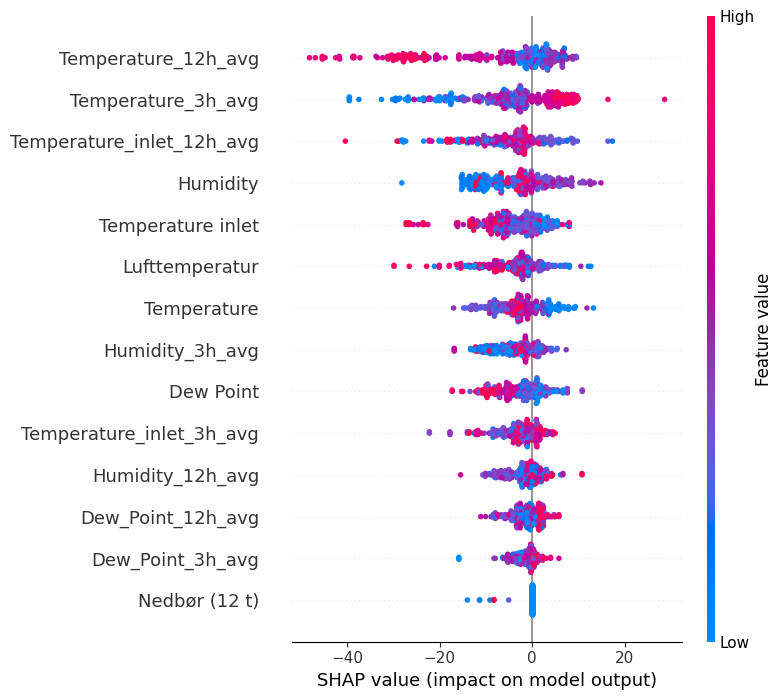

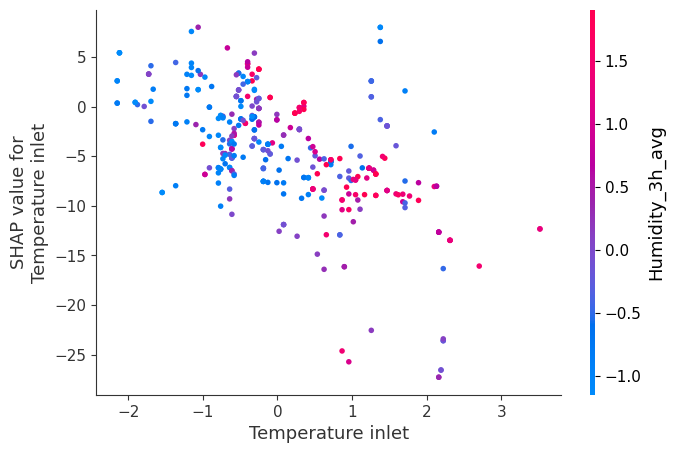

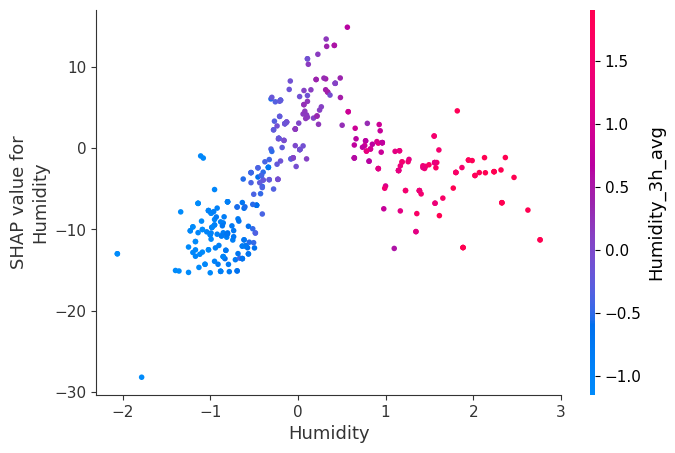

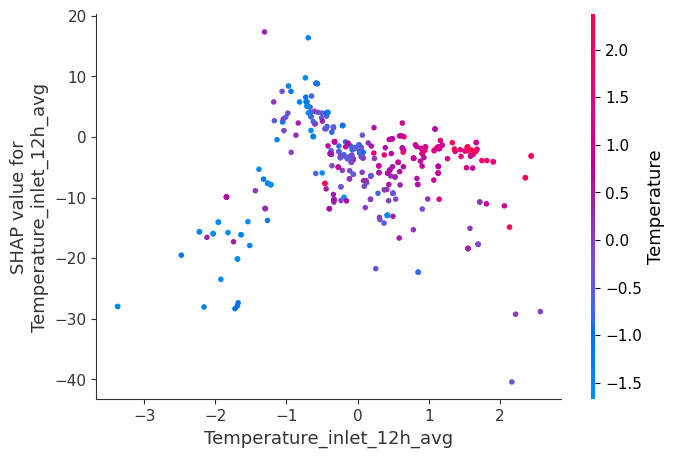

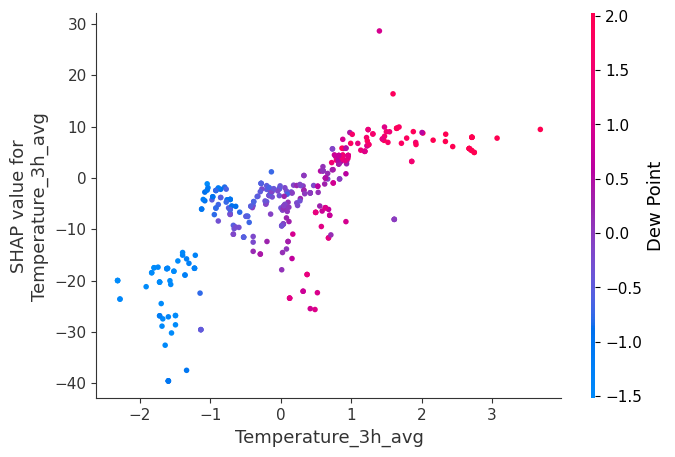

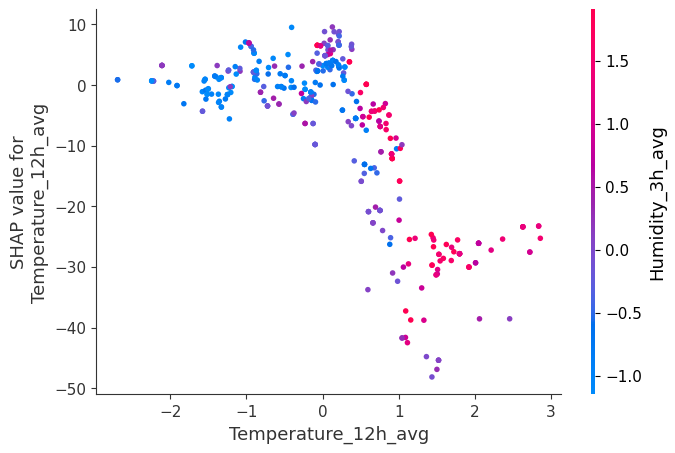

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt

# Load the new dataset
data_path = 'merged_data10.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the 'time_sin' and 'time_cos' columns if they exist
if 'time_sin' in data.columns:
    data = data.drop(columns=['time_sin'])
if 'time_cos' in data.columns:
    data = data.drop(columns=['time_cos'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('gb', GradientBoostingRegressor(random_state=42, **{
        'learning_rate': 0.07,
        'max_depth': 7,
        'min_samples_leaf': 4,
        'min_samples_split': 2,
        'n_estimators': 600,
        'subsample': 0.8
    })),
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define the meta-model
meta_model = LinearRegression()

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the Stacking Regressor
stacking_regressor.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_stack = stacking_regressor.predict(X_test)

# Calculate regression metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Regressor Mean Absolute Error (MAE): {mae_stack}")
print(f"Stacking Regressor Mean Squared Error (MSE): {mse_stack}")
print(f"Stacking Regressor R-squared (R²): {r2_stack}")

# Save the model
joblib.dump(stacking_regressor, 'stacking_regressor_cast_error_model.pkl')

# Load the model (for deployment)
loaded_stack_model = joblib.load('stacking_regressor_cast_error_model.pkl')

# Example prediction
example_pred_stack = loaded_stack_model.predict(X_test[:5])
print("Example Predictions (Stacking Regressor):", example_pred_stack)

# Perform SHAP analysis on the Gradient Boosting Regressor
best_gb_model = stacking_regressor.named_estimators_['gb']

# SHAP Analysis
explainer = shap.Explainer(best_gb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


Stacking Regressor Mean Absolute Error (MAE): 8.908494921826575
Stacking Regressor Mean Squared Error (MSE): 427.5172984640497
Stacking Regressor R-squared (R²): -0.31254438803633233
Example Predictions (Stacking Regressor): [56.60178696 23.23496395 15.26544146  2.56672652  1.91046955]


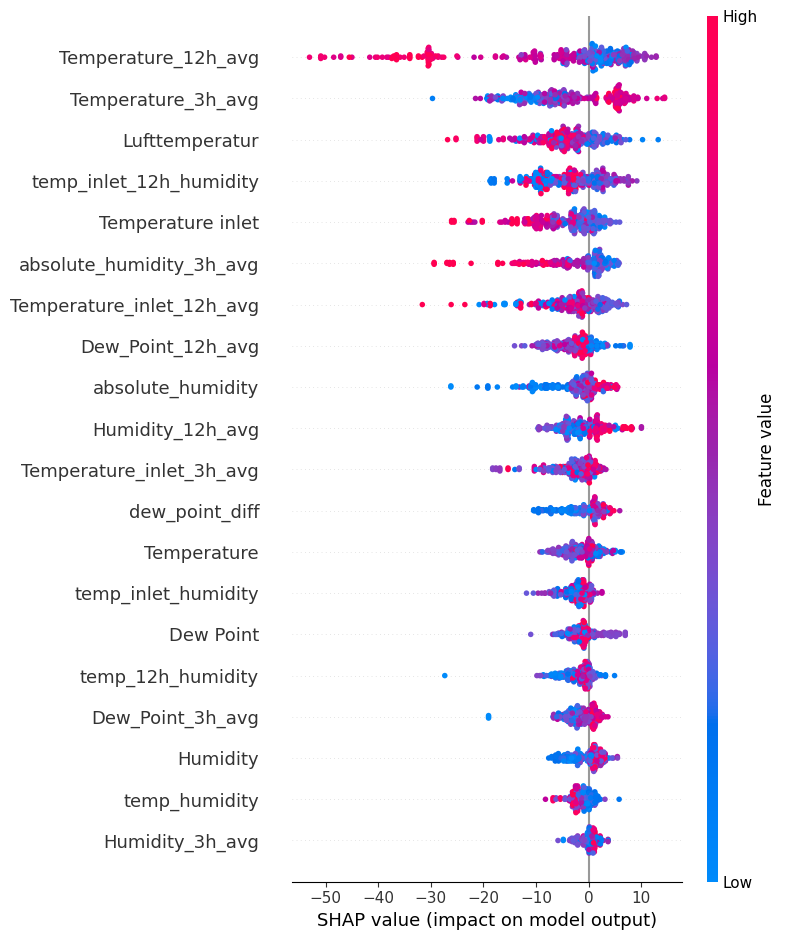

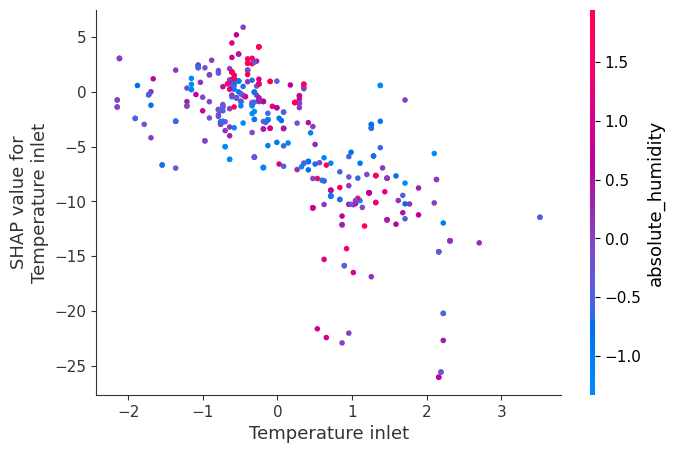

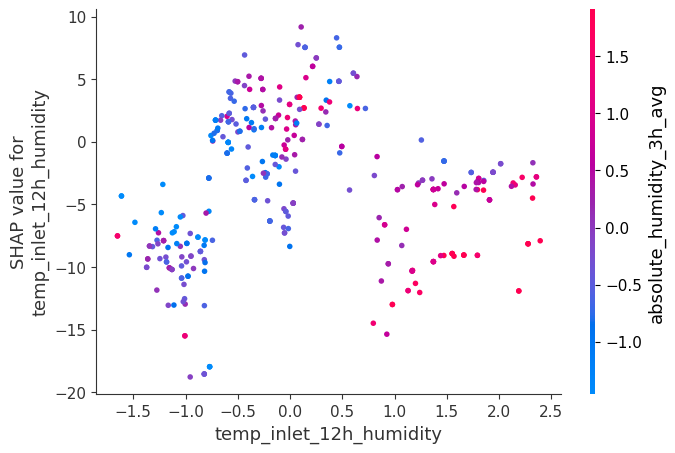

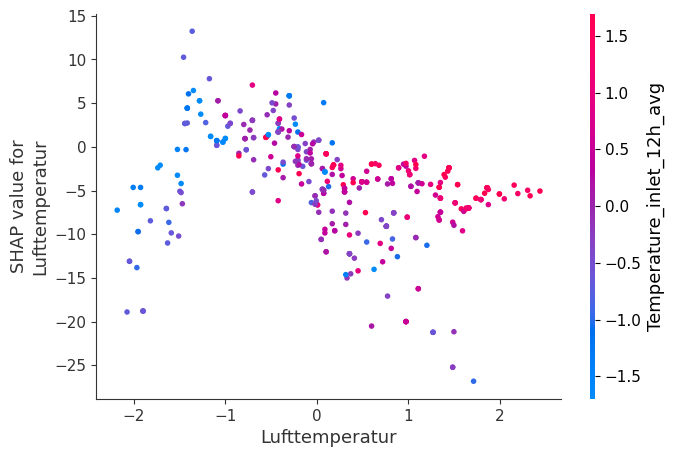

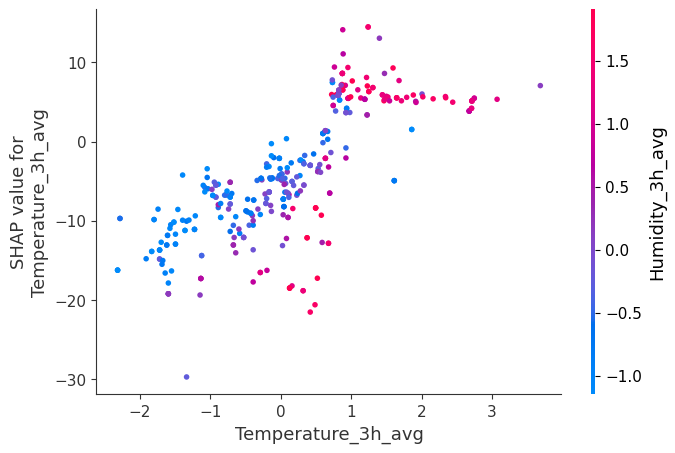

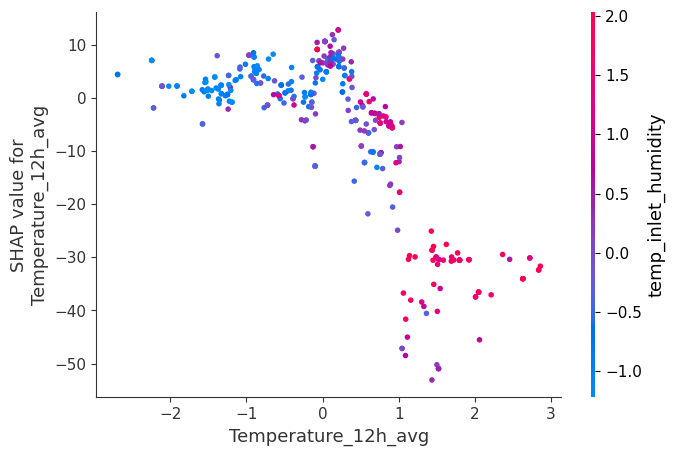

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [3]:
data = pd.read_csv('merged_data11.csv')

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('gb', GradientBoostingRegressor(random_state=42, **{
        'learning_rate': 0.07,
        'max_depth': 7,
        'min_samples_leaf': 4,
        'min_samples_split': 2,
        'n_estimators': 600,
        'subsample': 0.8
    })),
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define the meta-model
meta_model = LinearRegression()

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the Stacking Regressor
stacking_regressor.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_stack = stacking_regressor.predict(X_test)

# Calculate regression metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Regressor Mean Absolute Error (MAE): {mae_stack}")
print(f"Stacking Regressor Mean Squared Error (MSE): {mse_stack}")
print(f"Stacking Regressor R-squared (R²): {r2_stack}")

# Save the model
joblib.dump(stacking_regressor, 'stacking_regressor_cast_error_model_with_features.pkl')

# Load the model (for deployment)
loaded_stack_model = joblib.load('stacking_regressor_cast_error_model_with_features.pkl')

# Example prediction
example_pred_stack = loaded_stack_model.predict(X_test[:5])
print("Example Predictions (Stacking Regressor):", example_pred_stack)

# Perform SHAP analysis on the Gradient Boosting Regressor
best_gb_model = stacking_regressor.named_estimators_['gb']

# SHAP Analysis
explainer = shap.Explainer(best_gb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


Training gb model...
Fitting 2 folds for each of 216 candidates, totalling 432 fits
gb best parameters: {'learning_rate': 0.07, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600, 'subsample': 0.8}
Training rf model...
Fitting 2 folds for each of 24 candidates, totalling 48 fits
rf best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training xgb model...
Fitting 2 folds for each of 108 candidates, totalling 216 fits
xgb best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 600, 'subsample': 0.8}
Training Stacking Regressor with LinearRegression as meta-model...
Stacking Regressor with LinearRegression Mean Absolute Error (MAE): 9.446024229810526
Stacking Regressor with LinearRegression Mean Squared Error (MSE): 440.4138648971536
Stacking Regressor with LinearRegression R-squared (R²): -0.35213884645362525
Training Stacking Regressor with Ridge as meta-model...


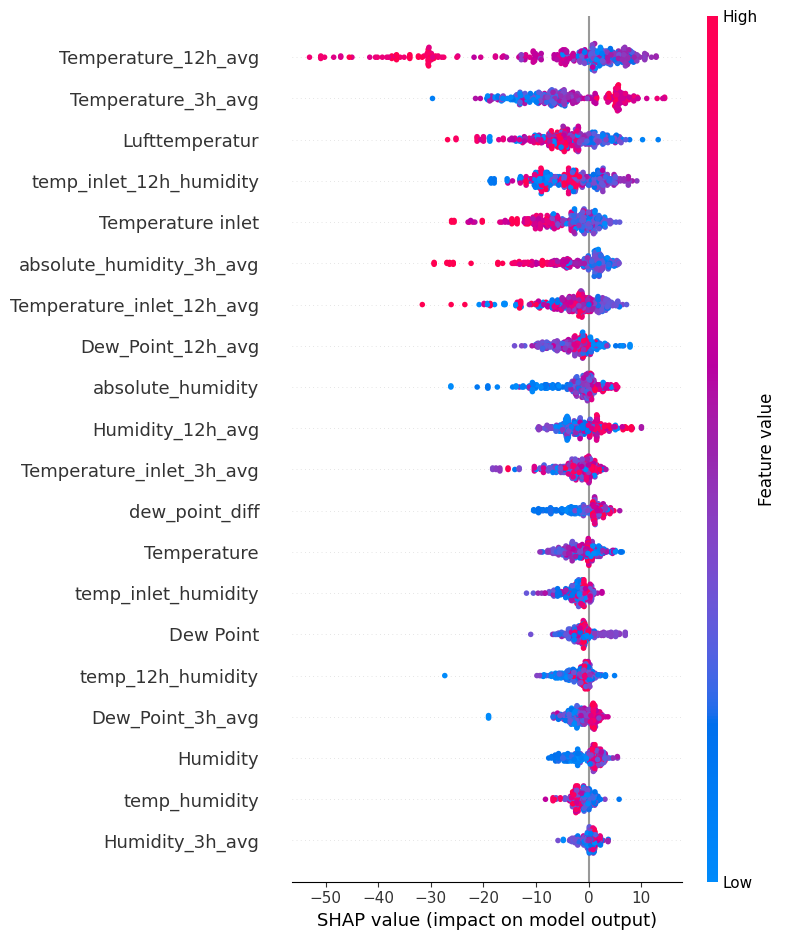

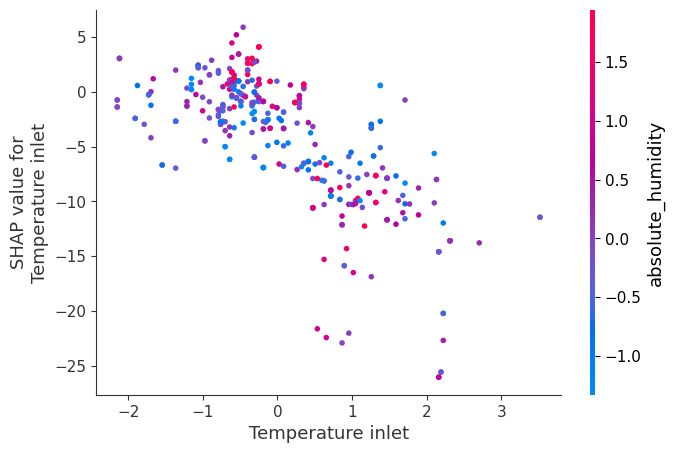

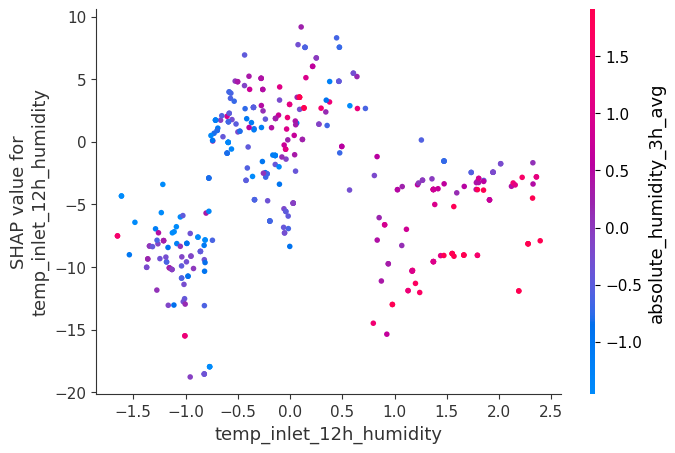

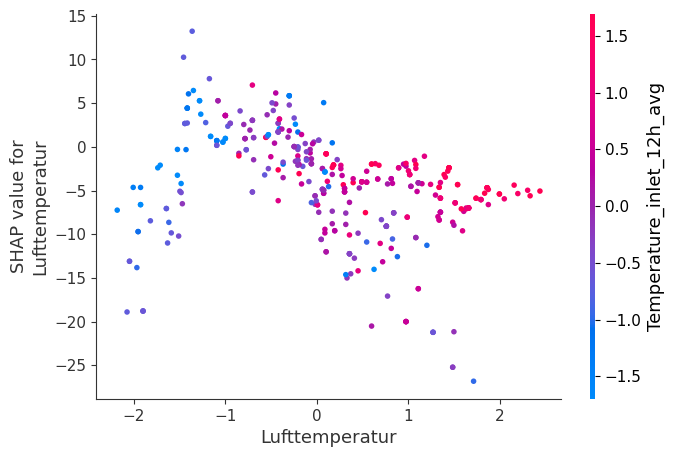

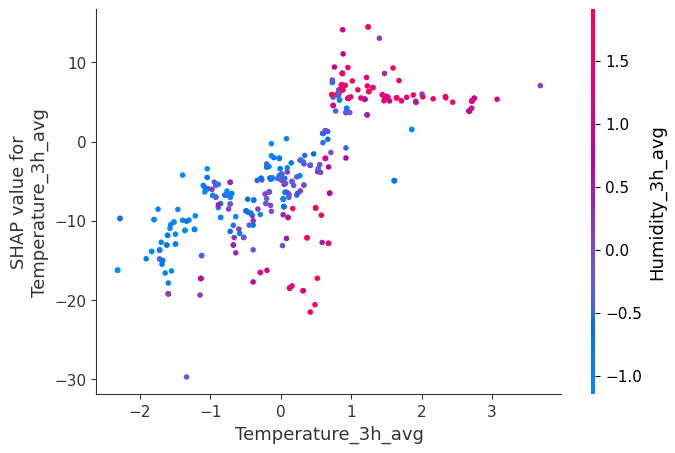

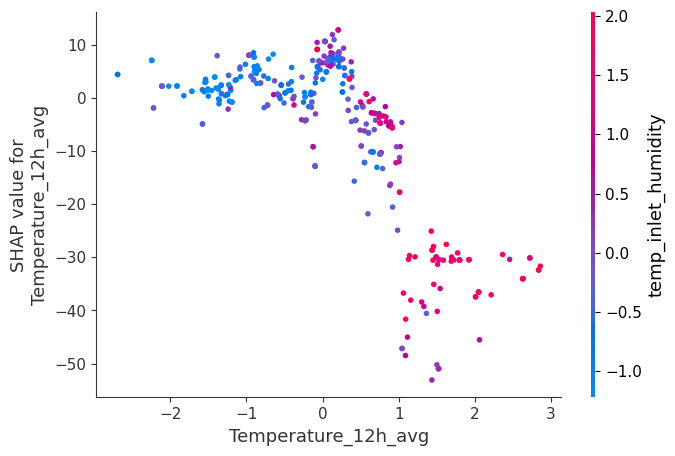

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'merged_data11.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the base models with refined hyperparameter grids
param_grids = {
    'gb': {
        'learning_rate': [0.03, 0.05, 0.07],
        'max_depth': [5, 6, 7],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [2, 5],
        'n_estimators': [400, 500, 600],
        'subsample': [0.8, 0.9]
    },
    'rf': {
        'n_estimators': [200, 300, 400],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'learning_rate': [0.03, 0.05, 0.07],
        'max_depth': [5, 6, 7],
        'n_estimators': [400, 500, 600],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]
    }
}

# Initialize the base models
base_models = {
    'gb': GradientBoostingRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

# Perform grid search for each base model
best_base_models = {}
for name, model in base_models.items():
    print(f"Training {name} model...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_base_models[name] = grid_search.best_estimator_
    print(f"{name} best parameters: {grid_search.best_params_}")

# Define the meta-models to try
meta_models = [LinearRegression(), Ridge(), Lasso()]

best_mae = float("inf")
best_model = None
best_meta_model_name = ""

# Perform stacking with different meta-models
for meta_model in meta_models:
    print(f"Training Stacking Regressor with {meta_model.__class__.__name__} as meta-model...")
    stacking_regressor = StackingRegressor(estimators=[('gb', best_base_models['gb']), ('rf', best_base_models['rf']), ('xgb', best_base_models['xgb'])], final_estimator=meta_model, cv=5)
    stacking_regressor.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test data
    y_pred_stack = stacking_regressor.predict(X_test)
    
    # Calculate regression metrics
    mae_stack = mean_absolute_error(y_test, y_pred_stack)
    mse_stack = mean_squared_error(y_test, y_pred_stack)
    r2_stack = r2_score(y_test, y_pred_stack)
    
    print(f"Stacking Regressor with {meta_model.__class__.__name__} Mean Absolute Error (MAE): {mae_stack}")
    print(f"Stacking Regressor with {meta_model.__class__.__name__} Mean Squared Error (MSE): {mse_stack}")
    print(f"Stacking Regressor with {meta_model.__class__.__name__} R-squared (R²): {r2_stack}")
    
    # Save the best performing model
    if mae_stack < best_mae:
        best_mae = mae_stack
        best_model = stacking_regressor
        best_meta_model_name = meta_model.__class__.__name__

print(f"Best meta-model: {best_meta_model_name}")

# Save the best model
joblib.dump(best_model, 'best_stacking_regressor_cast_error_model.pkl')

# Load the model (for deployment)
loaded_best_model = joblib.load('best_stacking_regressor_cast_error_model.pkl')

# Example prediction
example_pred_stack = loaded_best_model.predict(X_test[:5])
print("Example Predictions (Best Stacking Regressor):", example_pred_stack)

# Perform SHAP analysis on the Gradient Boosting Regressor
best_gb_model = best_model.named_estimators_['gb']

# SHAP Analysis
explainer = shap.Explainer(best_gb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)


Training gb model...
Fitting 2 folds for each of 32 candidates, totalling 64 fits
gb best parameters: {'learning_rate': 0.07, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600, 'subsample': 0.8}
Training rf model...
Fitting 2 folds for each of 16 candidates, totalling 32 fits
rf best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training xgb model...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
xgb best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 600, 'subsample': 0.8}
Training Stacking Regressor with LinearRegression as meta-model...
Stacking Regressor with LinearRegression Mean Absolute Error (MAE): 9.258130733336616
Stacking Regressor with LinearRegression Mean Squared Error (MSE): 439.18379872108255
Stacking Regressor with LinearRegression R-squared (R²): -0.3483623525851529
Training Stacking Regressor with Ridge as meta-model...
Stack

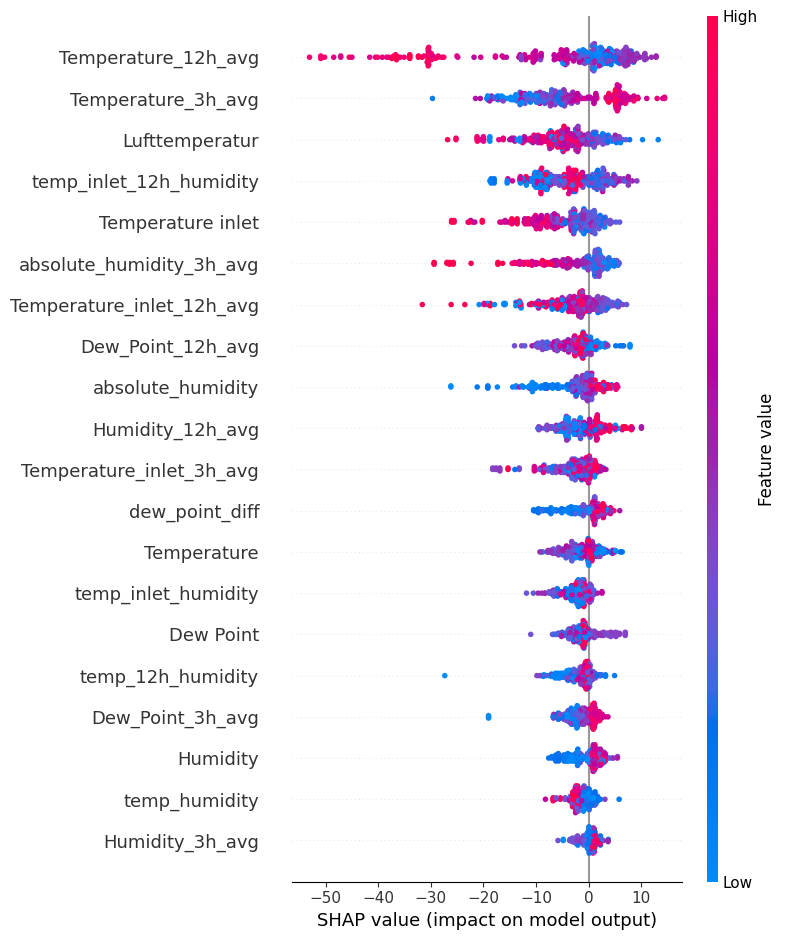

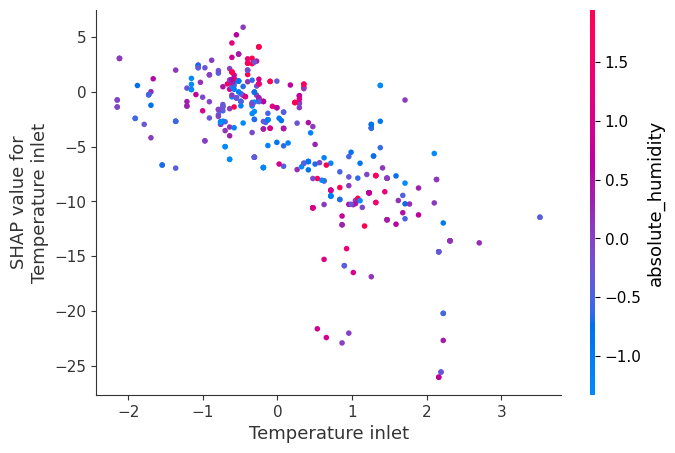

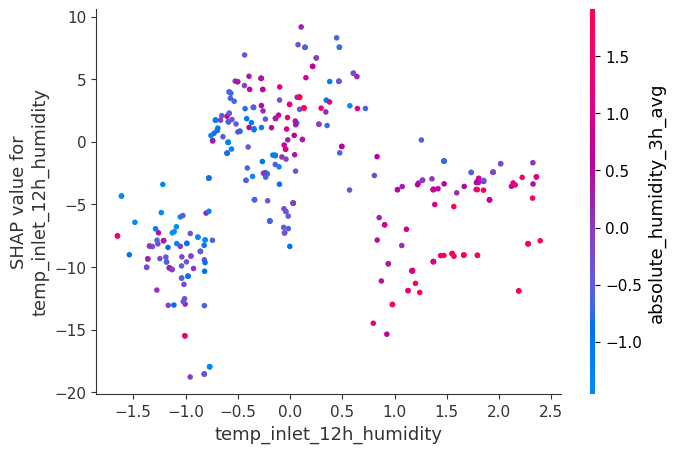

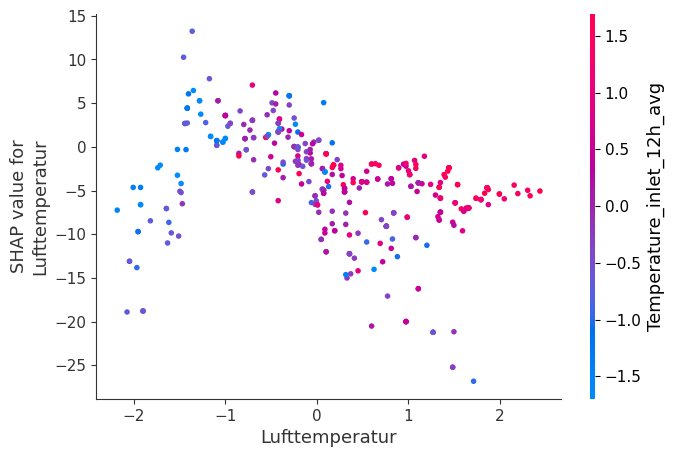

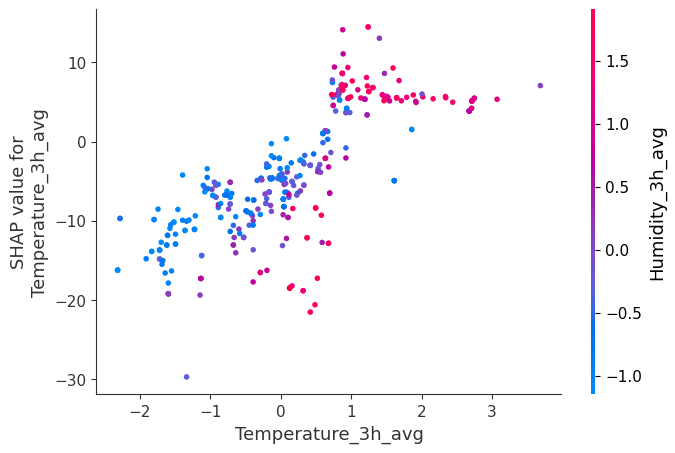

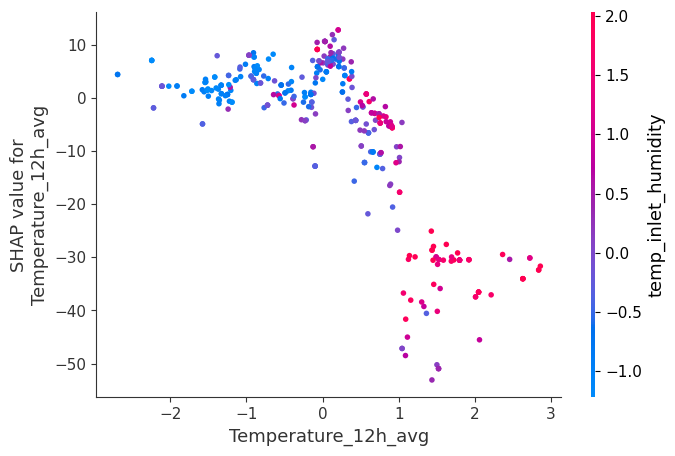

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'merged_data11.csv'
data = pd.read_csv(data_path)

# Convert 'datostøpt' to datetime
data['datostøpt'] = pd.to_datetime(data['datostøpt'])

# Drop the original 'datostøpt' column and 'cast error' target
X = data.drop(columns=['cast error', 'datostøpt'])
y = data['cast error'].astype(float) * 100  # Convert to float and scale to 0-100

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['cast error'])

# Pipeline for scaling
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the base models with refined hyperparameter grids
param_grids = {
    'gb': {
        'learning_rate': [0.05, 0.07],
        'max_depth': [6, 7],
        'min_samples_leaf': [3, 4],
        'min_samples_split': [2, 4],
        'n_estimators': [500, 600],
        'subsample': [0.8]
    },
    'rf': {
        'n_estimators': [200, 300],
        'max_depth': [20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'learning_rate': [0.05, 0.07],
        'max_depth': [6, 7],
        'n_estimators': [500, 600],
        'subsample': [0.8],
        'colsample_bytree': [0.8]
    }
}

# Initialize the base models
base_models = {
    'gb': GradientBoostingRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

# Perform grid search for each base model
best_base_models = {}
for name, model in base_models.items():
    print(f"Training {name} model...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_base_models[name] = grid_search.best_estimator_
    print(f"{name} best parameters: {grid_search.best_params_}")

# Define the meta-models to try
meta_models = [LinearRegression(), Ridge(), Lasso()]

best_mae = float("inf")
best_model = None
best_meta_model_name = ""

# Perform stacking with different meta-models
for meta_model in meta_models:
    print(f"Training Stacking Regressor with {meta_model.__class__.__name__} as meta-model...")
    stacking_regressor = StackingRegressor(estimators=[('gb', best_base_models['gb']), ('rf', best_base_models['rf']), ('xgb', best_base_models['xgb'])], final_estimator=meta_model, cv=5)
    stacking_regressor.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test data
    y_pred_stack = stacking_regressor.predict(X_test)
    
    # Calculate regression metrics
    mae_stack = mean_absolute_error(y_test, y_pred_stack)
    mse_stack = mean_squared_error(y_test, y_pred_stack)
    r2_stack = r2_score(y_test, y_pred_stack)
    
    print(f"Stacking Regressor with {meta_model.__class__.__name__} Mean Absolute Error (MAE): {mae_stack}")
    print(f"Stacking Regressor with {meta_model.__class__.__name__} Mean Squared Error (MSE): {mse_stack}")
    print(f"Stacking Regressor with {meta_model.__class__.__name__} R-squared (R²): {r2_stack}")
    
    # Save the best performing model
    if mae_stack < best_mae:
        best_mae = mae_stack
        best_model = stacking_regressor
        best_meta_model_name = meta_model.__class__.__name__

print(f"Best meta-model: {best_meta_model_name}")

# Save the best model
joblib.dump(best_model, 'best_stacking_regressor_cast_error_model.pkl')

# Load the model (for deployment)
loaded_best_model = joblib.load('best_stacking_regressor_cast_error_model.pkl')

# Example prediction
example_pred_stack = loaded_best_model.predict(X_test[:5])
print("Example Predictions (Best Stacking Regressor):", example_pred_stack)

# Perform SHAP analysis on the Gradient Boosting Regressor
best_gb_model = best_model.named_estimators_['gb']

# SHAP Analysis
explainer = shap.Explainer(best_gb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Dependence Plot for top features
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-5:]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns)

# SHAP Feature Importance Plot
shap.plots.bar(shap_values, feature_names=X.columns)
